# Scooby-Doo Episode Analysis 

## Overview

This project analyzes episodes from the popular TV show Scooby-Doo.  If you are not familiar with this show, more information can be found on [Scoobypedia](https://scoobydoo.fandom.com/wiki/Scoobypedia).

## Datasets

These data come from Kaggle in the [scoobydoo-complete](https://www.kaggle.com/datasets/williamschooleman/scoobydoo-complete) dataset.  Included is a [PDF](What_Makes_a_Good_Scooby_Doo_Analysis.pdf) from the author of the dataset, that provides detailed information on how the data was collected, additional details about the features, and how the data was analyzed to identify features potentially important to the IMDB score.

## Data Dictionary

### scoobydoo_episodes
| variable | description |
| ----------| ---------- |
| index	| index based on Scoobypedia |
| series_name | Name of the series in which the episode takes place or in movies' cases the Scoobypedia's grouping classification |
| network | Network the TV series takes place in, if it is a movie will use similar grouping as series.name variable |
| season | Season of TV Series, if not TV Series will default to the format |
| title | Title of Episode/Movie |
| imdb | Score on IMDB (NULL if recently aired) |
| engagement | Number of reviews on IMDB (NULL if very recently aired) |
| date_aired | Dated aired in US |
| run_time | Run time in min |
| format | Type |

### scoobydoo_monsters
| variable | description |
| ---------- | ---------|
|index | index based on Scoobypedia |
|monster_name | name of monster |
|monster_gender | monster gender |
|monster_type | monster type |
|monster_subtype | monster subtype |
|monster_species | monster_species |
|monster_real | was monster real |
|monster_amount | monster amount |
|caught_fred | caught by Fred |
|caught_daphnie | caught by Daphnie |
|caught_velma | caught by Velma |
|caught_shaggy | caught by Shaggy |
|caught_scooby | caught by Scooby |
|captured_fred | captured Fred |
|captured_daphnie |	captured Daphnie |
|captured_velma  | captured Velma |
|captured_shaggy | captured Shaggy |
|captured_scooby | captured Scooby |
|unmask_fred | unmask by fred |
|unmask_daphnie | unmask by Daphnie |
|unmask_velma | unmask by Velma |
|unmask_shaggy | unmask by Shaggy |
|unmask_scooby | unmask by Scooby |
|snack_fred | snack offered by Fred |
|snack_daphnie | snack offered by Daphnie |
|snack_velma | snack offered by Velma |
|snack_shaggy | snack offered by Shaggy |
|snack_scooby | snack offered by Scooby |
|unmask_other |	unmask by other |
|caught_other | caught by other |
|caught_not | not caught |
|trap_work_first | trap work first |
|setting_terrain | setting type of terrain |
|setting_country_state | setting country state |
|suspects_amount | suspects amount |
|non_suspect | non suspect |
|arrested | arrested |
|culprit_name |	culprit name |
|culprit_gender | culprit gender |
|culprit_amount | culprit amount |
|motive | motive |
|if_it_wasnt_for | phrase at the end of show, ie "if it wasnt for ..." |
|and_that | and that |
|door_gag | door gag |
|number_of_snacks | number of snacks |
|split_up |	split up |
|another_mystery | another mystery |
|set_a_trap | set a trap |
|jeepers | Times "jeepers" said |
|jinkies | Times "jinkies" said |
|my_glasses	| Times "my glasses" said |
|just_about_wrapped_up | Times "just about wrapped up" said |
|zoinks	| Times "zoinks"said |
|groovy	| Times "groovy" said |
|scooby_doo_where_are_you | Times "scooby doo where are you" said |
|rooby_rooby_roo | Times "rooby_rooby_roo" said |
|batman | batman in episode |
|scooby_dum | scooby_dum in episode |
|scrappy_doo | scrappy_doo in episode |
|hex_girls | hex_girls in episode |
|blue_falcon | blue_falcon in episode |
|fred_va | Fred voice actor |
|daphnie_va | Daphnie voice actor |
|velma_va | Velma voice actor |
|shaggy_va | Shaggy voice actor |
|scooby_va | Scooby voice actor |


## Initial Setup

In [312]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')  # safer for recent versions



In [223]:
# reading in the csv files
scoobydoo_episodes = pd.read_csv('datasets/scoobydoo_episodes.csv')
scoobydoo_monsters = pd.read_csv('datasets/scoobydoo_monsters.csv')

# checking out the datasets
scoobydoo_episodes.head()
scoobydoo_monsters.head()

,Index,Monster Name,Monster Gender,Monster Type,Monster Subtype,Monster Species,Monster Real,Monster Amount,Caught Fred,Caught Daphnie,...,Batman,Scooby Dum,Scrappy Doo,Hex Girls,Blue Falcon,Fred Va,Daphnie Va,Velma Va,Shaggy Va,Scooby Va
0,1,Black Knight,Male,Possessed Object,Suit,Object,False,1,False,False,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,Ghost of Cptn. Cuttler,Male,Ghost,Suit,Human,False,1,False,False,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,Phantom,Male,Ghost,Phantom,Human,False,1,False,False,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,Miner 49'er,Male,Ancient,Miner,Human,False,1,True,False,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,Indian Witch Doctor,Female,Ancient,Witch Doctor,Human,False,1,False,False,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


## Data Cleansing
This section contains steps to clean the data so it's in a more usable state for analysis.

### Merge the `scoobydoo_episodes` and the `scoobydoo_monsters` DataFrames

In [224]:
# join the two datasets together 
scoobydoo_merged = pd.merge(scoobydoo_episodes, scoobydoo_monsters, on='Index', how='inner')
scoobydoo_merged.head()


,Index,Series Name,Network,Season,Title,IMDB,Engagement,Date Aired,Run Time,Format,...,Batman,Scooby Dum,Scrappy Doo,Hex Girls,Blue Falcon,Fred Va,Daphnie Va,Velma Va,Shaggy Va,Scooby Va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,9/13/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,9/20/1969,22 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,9/27/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,10/4/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,10/11/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


In [225]:
# check out the dimensions of the merged dataframes
scoobydoo_merged.shape

(608, 75)

### Update column names to snake case
The column names of the original datasets are camel case with spaces. This standardizes the column names to lowercase and snakecase, which will make the data easier to work with.

In [226]:
scoobydoo_merged.columns = scoobydoo_merged.columns.str.lower().str.replace(" ", "_")
scoobydoo_merged.head()


,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,9/13/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,9/20/1969,22 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,9/27/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,10/4/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,10/11/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


### Remove duplicates
Any duplicate records in the dataset should be dropped.

In [227]:
scoobydoo_merged.drop_duplicates(subset=['title', 'date_aired'], inplace=True)
scoobydoo_merged.reset_index(drop=True, inplace=True)
scoobydoo_merged.head()

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,9/13/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,9/20/1969,22 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,9/27/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,10/4/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,10/11/1969,21 mins,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


Check the shape of the dataset with duplicate records removed. Five duplicate records were removed.

In [228]:
scoobydoo_merged.shape

(603, 75)

### Clean the `run_time` column

Currently the `run_time` field contains strings like: `"21 mins"`, which need to be converted to floats like: `21.0`.

In [229]:
scoobydoo_merged['run_time'] = scoobydoo_merged['run_time'].str.replace(" mins", "").astype('float')
scoobydoo_merged['run_time'].head(5)

0    21.0
1    22.0
2    21.0
3    21.0
4    21.0
Name: run_time, dtype: float64

### Impute missing `run_time` values with the average

The `run_time` column has some missing values for each format type, so we need to impute these missing values by replacing them with the average run time for their respective format type.

In [230]:
# previewing the data
scoobydoo_merged.head()
scoobydoo_merged[scoobydoo_merged['run_time'].isna()]

# checking out how many distinct formats are in the dataset
scoobydoo_merged['format'].unique()

# calculate the average run_time per format
# round to 2 decimal places for readability
avg_rt_by_format = round(scoobydoo_merged['run_time'].groupby(scoobydoo_merged['format']).mean(), 2)
avg_rt_by_format


format
Crossover                22.00
Movie                    75.55
Movie (Theatrical)       87.00
TV Series                23.53
TV Series (segmented)     9.71
Name: run_time, dtype: float64

Replace the missing values for `run_time` with the average calculated per each `format`.

In [231]:
scoobydoo_merged['run_time'] = scoobydoo_merged['run_time'].fillna(scoobydoo_merged['format'].map(avg_rt_by_format))

Check and make sure there are no missing values for `run_time` now.

In [232]:
scoobydoo_merged[scoobydoo_merged['run_time'].isna()]

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va


### View `run_time` by `format`

With the `run_time` column cleaned, let's see how the average run time differs across the various format types.

In [233]:
# we have the avg_rt_by_format variable calculated above
avg_rt_by_format

# sort it ascending for readability
avg_rt_by_format.sort_values(ascending=True, inplace=True)

# checking to make sure it's a Series
type(avg_rt_by_format)

# viewing the runtimes per format
avg_rt_by_format

format
TV Series (segmented)     9.71
Crossover                22.00
TV Series                23.53
Movie                    75.55
Movie (Theatrical)       87.00
Name: run_time, dtype: float64

### Cleaning the Network Column

There are some inconsistencies in the network column for entries like 'Cartoon Network' that need to be cleaned up and standardized into one value.

In [234]:
# check out the unique values within the network column
scoobydoo_merged["network"].unique()

array(['CBS', 'ABC', 'Syndication', 'TBC', 'Cartoon Network',
       'Warner Home Video', 'Cartoon  Network', 'Warner Bros. Picture',
       'Adult Swim', 'The WB', 'The CW', 'CartoonNetwork',
       'Cartoon Ntwrk', 'cartoon_network', 'Cartoon Netwrk',
       ' Cartoon Network', 'Cartoon Network ', 'Boomerang'], dtype=object)

In [235]:
def clean_network(value):
    """
    Function to clean the `network` column. After lowercasing the string and stripping whitespace, it checks for 'cartoon'
    or `network` and returns "Cartoon Network" if either is in the `network` string. Otherwise it returns the original value.

    NOTE: this is hacky, and should be modified to be more rebust since it could change a value to 'Cartoon Network' that matches
    on only one condition, but since I checked the distinct values, it works for now.
    """
    value_stripped = value.strip().lower()
    if 'cartoon' in value_stripped or 'network' in value_stripped:
        return "Cartoon Network"
    else:
        return value

In [236]:
# apply clean_network() to the network column
scoobydoo_merged["network"] = scoobydoo_merged["network"].apply(clean_network)

In [237]:
# check the unique values to ensure they have been properly standardized
scoobydoo_merged["network"].unique()

array(['CBS', 'ABC', 'Syndication', 'TBC', 'Cartoon Network',
       'Warner Home Video', 'Warner Bros. Picture', 'Adult Swim',
       'The WB', 'The CW', 'Boomerang'], dtype=object)

### Add Year Aired Column

This creates a new `year_aired` column so the data can be analyzed by year.

In [238]:
scoobydoo_merged["year_aired"] = scoobydoo_merged['date_aired'].str[-4:].astype(int)
scoobydoo_merged["year_aired"].head()


0    1969
1    1969
2    1969
3    1969
4    1969
Name: year_aired, dtype: int64

### Replacing Motive Values

The dataset creator noted that many entries in the `motive` column have very low counts, with some appearing only once, often in non-traditional series. To make analysis easier, I'm going to replace any value not in the top five with `Other`.

In [239]:
# check out the top 5
scoobydoo_merged.groupby('motive').size().sort_values(ascending=False).head(5)


motive
Competition         168
Theft               125
Treasure             54
Conquer              42
Natural Resource     26
dtype: int64

In [240]:
# grab the top 5 indexes
top_5 = scoobydoo_merged['motive'].value_counts().nlargest(5).index
top_5

Index(['Competition', 'Theft', 'Treasure', 'Conquer', 'Natural Resource'], dtype='object', name='motive')

In [241]:
# for the motives that are not in the top 5, replace them with "Other"
scoobydoo_merged.loc[~scoobydoo_merged.motive.isin(top_5), 'motive'] = "Other"

# view values counts for each motive
scoobydoo_merged['motive'].value_counts()

motive
Other               188
Competition         168
Theft               125
Treasure             54
Conquer              42
Natural Resource     26
Name: count, dtype: int64

### Splitting Out The Monster Columns

Some of the `monster*` columns have multiple values separated by commas when more than one monster is in the episode, so I want to separate these values so that each monster and its corresponding attributes are placed in their own new columns. Because there are so many, I will put these in their own DataFrame.

In [242]:
scoobydoo_monsters_split = scoobydoo_merged.copy()

monster_cols = ['monster_name', 'monster_gender', 'monster_type', 'monster_subtype', 'monster_species']
scoobydoo_monsters_split[monster_cols].head()

,monster_name,monster_gender,monster_type,monster_subtype,monster_species
0,Black Knight,Male,Possessed Object,Suit,Object
1,Ghost of Cptn. Cuttler,Male,Ghost,Suit,Human
2,Phantom,Male,Ghost,Phantom,Human
3,Miner 49'er,Male,Ancient,Miner,Human
4,Indian Witch Doctor,Female,Ancient,Witch Doctor,Human


In [243]:
def split_monster_cols(df, col_list):
    """
    Function to take a list of columns from a DataFrame and split them into new columns 
    based on a comma separated list of values.
    """
    for col in col_list:
        # split the column on comma into a DataFrame where each element is a new column
        split_col_df = df[col].str.split(',', expand=True)
        # get the max length of non-null rows for each column
        max_items = split_col_df.notnull().sum(axis=1).max()
        # strip white space of each value  
        for c in split_col_df.columns:
            split_col_df[c] = split_col_df[c].str.strip()
            
        column_names = []
        for i in range(0, max_items):
            column_name = f"{col}_part_{i+1}"
            column_names.append(column_name)
        split_col_df.columns = column_names
        df = df.join(split_col_df)
    return df

In [244]:
scoobydoo_monsters_split = split_monster_cols(scoobydoo_monsters_split, monster_cols)
scoobydoo_monsters_split.head()

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,monster_species_part_10,monster_species_part_11,monster_species_part_12,monster_species_part_13,monster_species_part_14,monster_species_part_15,monster_species_part_16,monster_species_part_17,monster_species_part_18,monster_species_part_19
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,9/13/1969,21.0,TV Series,...,None,None,None,None,None,None,None,None,None,None
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,9/20/1969,22.0,TV Series,...,None,None,None,None,None,None,None,None,None,None
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,9/27/1969,21.0,TV Series,...,None,None,None,None,None,None,None,None,None,None
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,10/4/1969,21.0,TV Series,...,None,None,None,None,None,None,None,None,None,None
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,10/11/1969,21.0,TV Series,...,None,None,None,None,None,None,None,None,None,None


## Exploratory Analysis

### Networks with Highest IMDB Scores

With the `network` column cleaned, what is the average IMDB score for each network?

In [245]:
scoobydoo_merged['imdb'] = pd.to_numeric(scoobydoo_merged['imdb'], errors='coerce')

round(scoobydoo_merged.groupby('network')['imdb'].mean(), 2).sort_values(ascending=False)

network
Adult Swim              8.10
Cartoon Network         7.91
CBS                     7.90
Boomerang               7.57
The WB                  7.43
ABC                     7.17
Syndication             6.97
Warner Home Video       6.58
TBC                     5.80
The CW                  5.75
Warner Bros. Picture    5.30
Name: imdb, dtype: float64

### Which Character Caught the Most Monsters?

Out of Fred, Daphne, Velma, Shaggy, or Scooby, which character caught the most monsters?

In [318]:
# taking a look at the DataFrame
scoobydoo_merged.head()

# create a dict to rename columns to the character they represent
rename_dict = {
    'caught_fred': 'Fred',
    'caught_daphnie': 'Daphnie',
    'caught_velma': 'Velma',
    'caught_shaggy': 'Shaggy',
    'caught_scooby': 'Scooby'
}

# rename the column with the mapping above
# sum each column (since values contain boolean indicating whether or not they caught the monster)
# sort by the most monsters caught
caught_per_character = scoobydoo_merged[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].rename(columns=rename_dict).sum().sort_values(ascending=False)
caught_per_character

Scooby     160
Fred       132
Shaggy      77
Velma       41
Daphnie     29
dtype: object

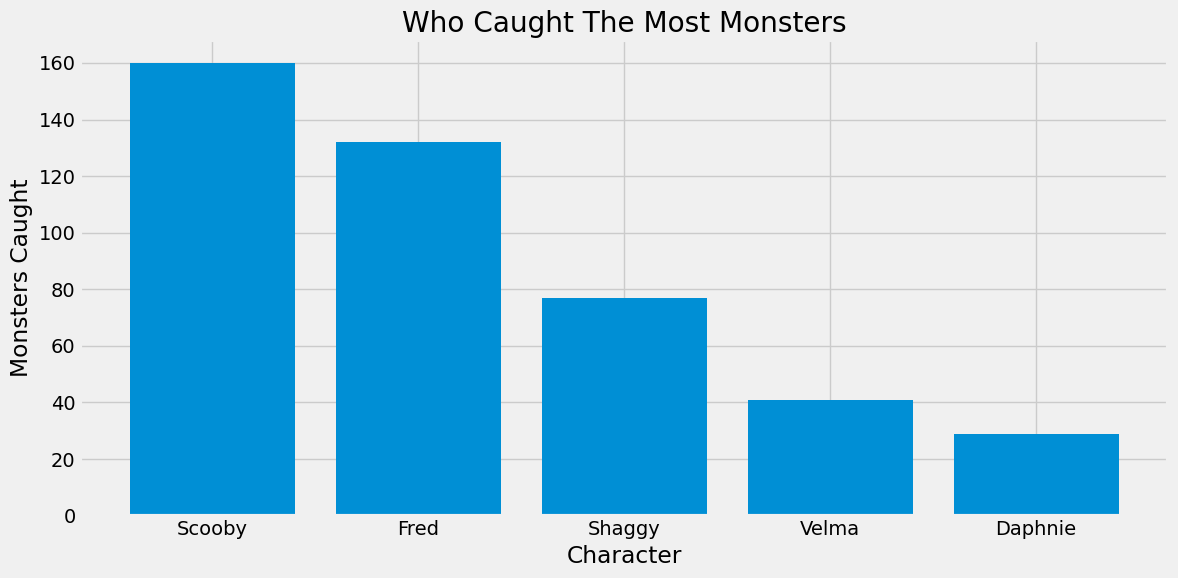

In [319]:
# create the figure and plot
plt.figure(figsize=(12, 6))
plt.bar(caught_per_character.index, caught_per_character.values)
# add title and labels
plt.title('Who Caught The Most Monsters')
plt.xlabel('Character')
plt.ylabel('Monsters Caught')

plt.tight_layout() # automatically adjusts the spacing of the plot elements

# save the plot in the figures directory
plt.savefig('figures/caught_monsters_per_character.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

### Which Character Unmasked The Most Monsters
Out of all the characters, who unmasked the most monsters?

In [305]:
# taking a look at the DataFrame
scoobydoo_merged.head()

# create a dict to rename columns to the character they represent
rename_dict = {
    'unmask_fred': 'Fred',
    'unmask_daphnie': 'Daphnie',
    'unmask_velma': 'Velma',
    'unmask_shaggy': 'Shaggy',
    'unmask_scooby': 'Scooby',
    'unmask_other': 'Other'
}

# rename the column with the mapping above
# sum each column (since values contain boolean indicating whether or not they unmasked the monster)
# sort by the most monsters unmasked
unmasked_per_characters = scoobydoo_merged[['unmask_fred', 'unmask_daphnie', 'unmask_velma', 'unmask_shaggy', 'unmask_scooby', 'unmask_other']].rename(columns=rename_dict).sum().sort_values(ascending=False)
unmasked_per_characters

Fred       102
Velma       94
Daphnie     37
Other       35
Scooby      23
Shaggy      13
dtype: object

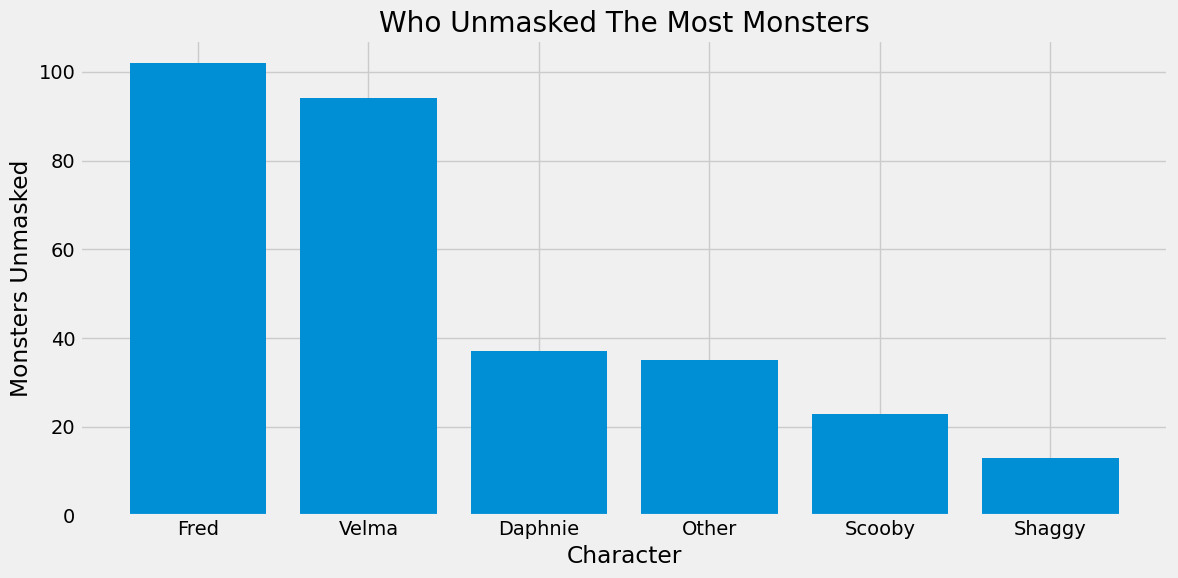

In [ ]:
# create the figure and plot
plt.figure(figsize=(12, 6))
plt.bar(unmasked_per_characters.index, unmasked_per_characters.values)
# add title and labels
plt.title('Who Unmasked The Most Monsters')
plt.xlabel('Character')
plt.ylabel('Monsters Unmasked')

plt.tight_layout() # automatically adjusts the spacing of the plot elements

# save the plot in the figures directory
plt.savefig('figures/unmasked_monsters_per_character.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

In [247]:
scoobydoo_merged.head() # trap_work_first column is the one we are interested in

# subset the records to the ones where the character's first trap worked
trap_worked_first_try = scoobydoo_merged[scoobydoo_merged['trap_work_first'] == True]
trap_worked_first_try.head()


,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va,year_aired
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,10/4/1969,21.0,TV Series,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969
5,6,"Scooby Doo, Where Are You!",CBS,1,What the Hex Going On?,8.4,384.0,10/18/1969,21.0,TV Series,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969
12,13,"Scooby Doo, Where Are You!",CBS,1,Which Witch is Which,8.4,356.0,12/6/1969,21.0,TV Series,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969
17,18,"Scooby Doo, Where Are You!",CBS,2,Nowhere to Hyde,8.3,322.0,9/12/1970,21.0,TV Series,...,False,False,False,False,Frank Welker,Heather North,Nicole Jaffe,Casey Kasem,Don Messick,1970
18,19,"Scooby Doo, Where Are You!",CBS,2,Mystery Mask Mix-Up,7.8,312.0,9/19/1970,21.0,TV Series,...,False,False,False,False,Frank Welker,Heather North,Nicole Jaffe,Casey Kasem,Don Messick,1970


In [248]:
# get counts of how many times each character caught the monster on the first try
# also applying the rename_dict from above for cleaner output
trap_worked_first_try[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].rename(columns=rename_dict).sum().sort_values(ascending=False)

Fred       76
Scooby     22
Shaggy     15
Velma      12
Daphnie    10
dtype: object

### Episodes per Year
#### Top 10 Years With The Most Episodes

In [249]:
scoobydoo_merged.groupby('year_aired').size().sort_values(ascending=False).head(10)

year_aired
1977    40
1981    36
1978    32
2020    30
1982    26
1980    25
1983    24
2017    22
1984    20
2015    19
dtype: int64

### Top 10 Episode Counts by Year and Format

In [250]:
scoobydoo_merged.groupby(['year_aired', 'format']).size().sort_values(ascending=False).head(10)

year_aired  format               
1981        TV Series (segmented)    36
1977        TV Series (segmented)    32
2020        TV Series                27
1982        TV Series (segmented)    26
1980        TV Series (segmented)    24
1983        TV Series (segmented)    22
2017        TV Series                20
2012        TV Series                17
2015        TV Series                17
1972        TV Series                16
dtype: int64

### Who Offered the Most Snacks

According to the creator of the dataset, the `snack_fred`, `snack_daphnie`, `snack_velma`, `snack_shaggy`, and `snack_scooby` columns refers to "when a member of the gang offers someone a Scooby Snack" (usually given to Shaggy and Scooby).

Who offers the most snacks?

In [301]:
scoobydoo_merged.head()

rename_snack_dict = {
    'snack_fred': 'Fred',
    'snack_daphnie': 'Daphnie',
    'snack_velma': 'Velma',
    'snack_shaggy': 'Shaggy',
    'snack_scooby': 'Scooby'
}

# rename the columns using the dict for readability
# count up each time that character offered snacks
# sort them in descending order
snacks_per_character = scoobydoo_merged[['snack_fred', 'snack_daphnie', 'snack_velma', 'snack_shaggy', 'snack_scooby']].rename(columns=rename_snack_dict).sum().sort_values(ascending=False)
snacks_per_character

Daphnie    49
Shaggy     43
Velma      29
Fred       18
Scooby     12
dtype: object

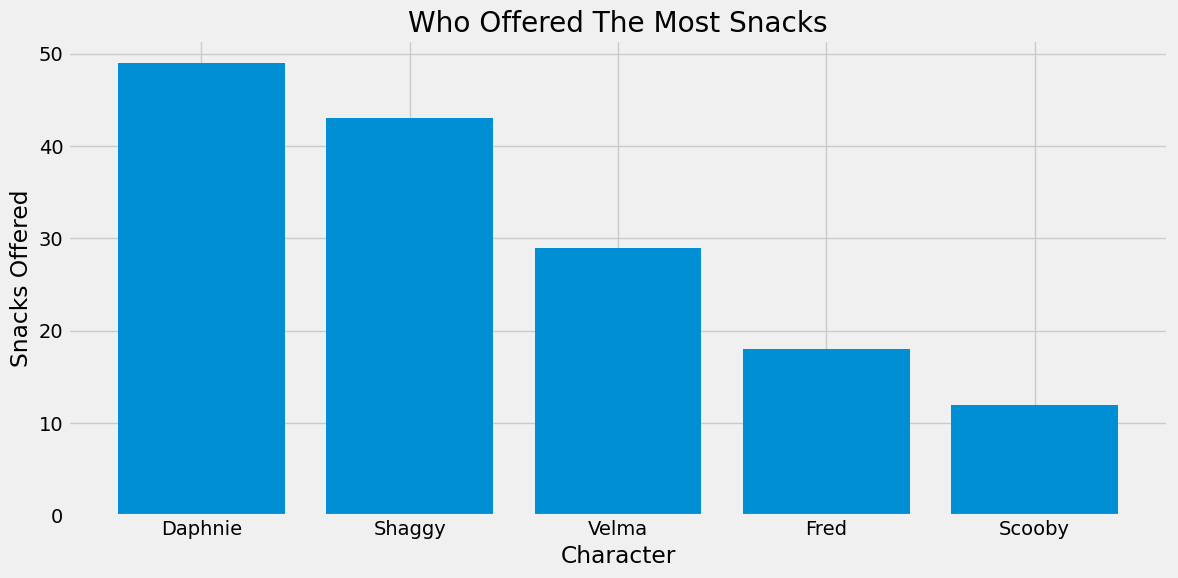

In [316]:
# create the figure and plot
plt.figure(figsize=(12, 6))
plt.bar(snacks_per_character.index, snacks_per_character.values)
# add title and labels
plt.title('Who Offered The Most Snacks')
plt.xlabel('Character')
plt.ylabel('Snacks Offered')

plt.tight_layout() # automatically adjusts the spacing of the plot elements

# save the plot in the figures directory
plt.savefig('figures/snacks_offered_per_character.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

### Catchphrases Per Minute

For those who have ever watched the show, I'm sure you've heard their catchphrases often: 'jeepers', 'jinkies', 'my_glasses', 'just_about_wrapped_up', 'zoinks', 'groovy', 'scooby_doo_where_are_you', 'rooby_rooby_roo'

This analyzes which catchphrase is used the most per minute across all episodes.

In [252]:
def add_catchphrase_column(df, catchphrases):
    """
    Function to add a list of catchphrases per minute to a DataFrame.
    """
    for catchphrase in catchphrases:
        catchphrase_column = f"{catchphrase}_per_minute"
        df[catchphrase_column] = round(df[catchphrase] / df['run_time'], 2)
    return df

In [253]:
# list out the catchphrases
catchphrases = ['jeepers', 'jinkies', 'my_glasses', 'just_about_wrapped_up', 'zoinks', 'groovy', 'scooby_doo_where_are_you', 'rooby_rooby_roo']

# copy the data into a new df
scoobydoo_phrases = scoobydoo_merged.copy()

# call the function to add the catchphrase columns
scoobydoo_phrases = add_catchphrase_column(scoobydoo_phrases, catchphrases=catchphrases)

# sum up the columns and sort them in descending order
scoobydoo_phrases[['jeepers_per_minute', 'jinkies_per_minute', 'my_glasses_per_minute', 'just_about_wrapped_up_per_minute', 'zoinks_per_minute', 'groovy_per_minute', 'scooby_doo_where_are_you_per_minute', 'rooby_rooby_roo_per_minute']].sum().sort_values(ascending=False)

zoinks_per_minute                      66.98
rooby_rooby_roo_per_minute             22.49
jinkies_per_minute                     19.14
jeepers_per_minute                      9.36
scooby_doo_where_are_you_per_minute     3.37
my_glasses_per_minute                   1.59
just_about_wrapped_up_per_minute        0.89
groovy_per_minute                       0.66
dtype: float64

### Average IMDB Scores by Network and Format

This is a pivot table to analyze the average IMDB scores, broken down by network for the rows and format for the columns.

In [254]:

scoobydoo_merged.pivot_table('imdb', index='network', aggfunc='mean', columns='format', fill_value=0, margins=True)


format,Crossover,Movie,Movie (Theatrical),TV Series,TV Series (segmented),All
network,,,,,,
ABC,6.800000,6.100000,0.0,7.463725,7.005143,7.166192
Adult Swim,8.100000,0.000000,0.0,0.000000,0.000000,8.100000
Boomerang,0.000000,0.000000,0.0,7.572881,0.000000,7.572881
CBS,0.000000,0.000000,0.0,7.902041,0.000000,7.902041
Cartoon Network,7.633333,6.040000,0.0,8.046053,0.000000,7.911905
Syndication,0.000000,6.966667,0.0,0.000000,0.000000,6.966667
TBC,0.000000,5.800000,0.0,0.000000,0.000000,5.800000
The CW,9.600000,0.000000,0.0,5.603846,0.000000,5.751852
The WB,0.000000,0.000000,0.0,7.429268,0.000000,7.429268


### Where Monsters Lurk 
What terrain types are most common for monster settings?

In [ ]:
# check out the unique options for terrain
scoobydoo_merged['setting_terrain'].unique()

# get counts per different terrain type and order desc
scoobydoo_merged.groupby('setting_terrain').size().sort_values(ascending=False)


setting_terrain
Urban       267
Rural       109
Forest       48
Desert       40
Island       25
Snow         25
Swamp        19
Coast        17
Jungle       15
Ocean        13
Cave          9
Mountain      9
Space         5
Air           1
Moon          1
dtype: int64

### Scooby-Doo World-Wide
What locations are most episodes set in? 

In [321]:
# preview unique locations
scoobydoo_merged['setting_country_state'].unique()

# get the 10 most frequent locations where the episode took place
scoobydoo_merged.groupby('setting_country_state').size().sort_values(ascending=False).head(10)


setting_country_state
United States    309
California        75
England           12
Mexico            10
New York           8
Louisiana          8
Canada             7
Greece             7
Japan              6
France             6
dtype: int64

What are the most popular locations in the United States?

In [330]:
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'Washington D.C.'
]

scoobydoo_us = scoobydoo_merged[scoobydoo_merged['setting_country_state'].isin(us_states)]
top_10_state_count = scoobydoo_us.groupby('setting_country_state').size().sort_values(ascending=False).head(10)
top_10_state_count

setting_country_state
California       75
Louisiana         8
New York          8
Massachusetts     5
Florida           5
Ohio              4
Arizona           4
Nevada            4
Hawaii            4
Pennsylvania      4
dtype: int64

### Engagement Over Time
How has the engagement with Scooby-Doo episdoes changed over time?

In [300]:
# preview
scoobydoo_merged[['engagement', 'year_aired']]
# average engagement scores per year
avg_engagement_per_yr = scoobydoo_merged.groupby('year_aired')['engagement'].mean().dropna()
# sample a few
avg_engagement_per_yr.head()

year_aired
1969    394.666667
1970    318.200000
1972    116.062500
1973     89.000000
1976     78.473684
Name: engagement, dtype: float64

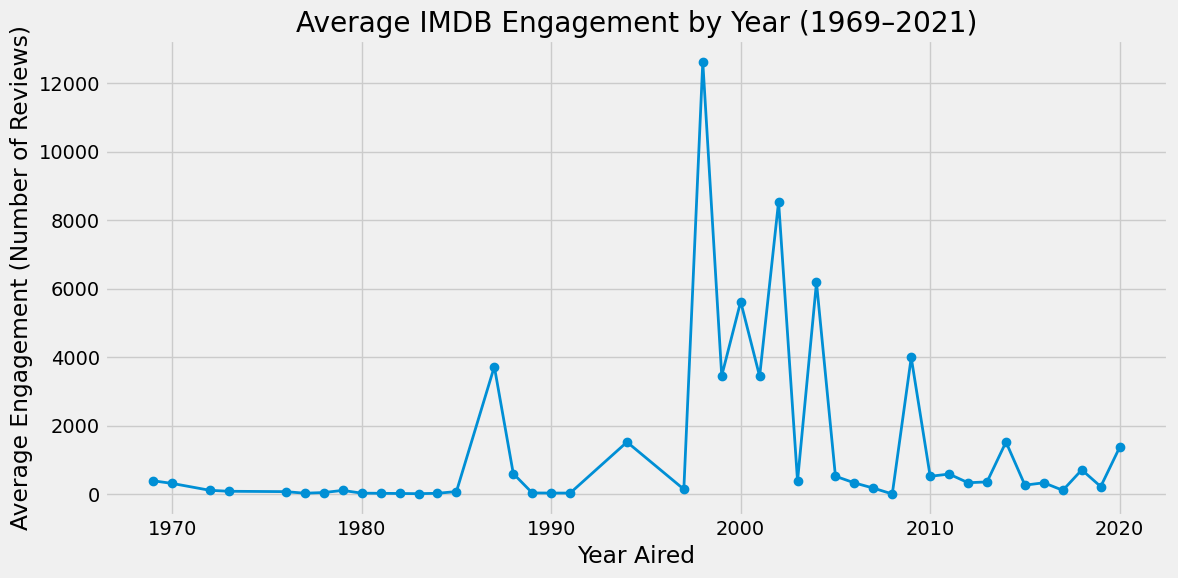

In [317]:
# create the figure and plot
plt.figure(figsize=(12, 6))
plt.plot(avg_engagement_per_yr.index, avg_engagement_per_yr.values, marker='o', linewidth=2)
# add title and labels
plt.title('Average IMDB Engagement by Year (1969–2021)')
plt.xlabel('Year Aired')
plt.ylabel('Average Engagement (Number of Reviews)')

plt.grid(True)
plt.tight_layout() # automatically adjusts the spacing of the plot elements

# save the plot in the figures directory
plt.savefig('figures/avg_engagement_per_year.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

